In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from flydance.io.smart_loader import FlyData
from flydance.vr.neuser import NeuserParams
from flydance.vr.neuser import FollowBarWatch
import sys
import os
sys.path.append("/Users/ambra-stella/flydance/experiments")

In [36]:
fname = "/Users/ambra-stella/bachelor/analysis/TNTe/reaction_summary.csv" # SPECIFY WHAT DISTRACTOR LIST
df = pd.read_csv(fname)
print(df.columns)

Index(['frame', 'timestamp', 'x', 'y', 'xvel', 'yvel', 't', 'x_px', 'y_px',
       'orientation_radians_mod_pi', 'contrast', 'luminance', 'center_x',
       'center_y', 'stage', 'direction', 'ON', 'direction_change',
       'area_change', 'area', 'stopped', 'ntimes', 'distraction_index',
       'fly_number', 'timing', 'speed', 'mean_angle', 'reaction_direction'],
      dtype='object')


# lists all flies, and the number of flies:

In [37]:
list_flies = df['fly_number'].tolist()
list_flies = set(list_flies)
list_flies = list(list_flies)
print('flies with valid runns:', list_flies)
print('Number of flies:', len(list_flies))

flies with valid runns: ['20210625_151046', '20210630_123240', '20210625_150032', '20210623_151657', '20210701_165947', '20210624_172803', '20210628_135940', '20210702_122539', '20210630_115801', '20210622_163301', '20210625_144628', '20210624_142719']
Number of flies: 12


# maximum number of distraction bars visible to at least on fly:

In [38]:
list_distraction_index = df['distraction_index'].tolist()
list_distraction_index = set(list_distraction_index)
list_distraction_index = list(list_distraction_index)
#print(list_distraction_index)
print('max distractions a fly had:', len(list_distraction_index), list_distraction_index)

max distractions a fly had: 3 [0, 1, 2]


# number of total trajetories:

In [39]:
traj_count = 0
for flies in list_flies:
    piece = df[(df.fly_number == flies) & (df.timing == 'after')]
    for index in list_distraction_index:
        smaller_piece = piece.loc[piece.distraction_index == index]
        if smaller_piece.empty:
                pass
        else:
            traj_count = traj_count +1
            #for i, row in smaller_piece.iterrows():
            #    testout= after_direction(row)
print('total trajectories:', traj_count)

total trajectories: 16


# Shows all the trajectories:

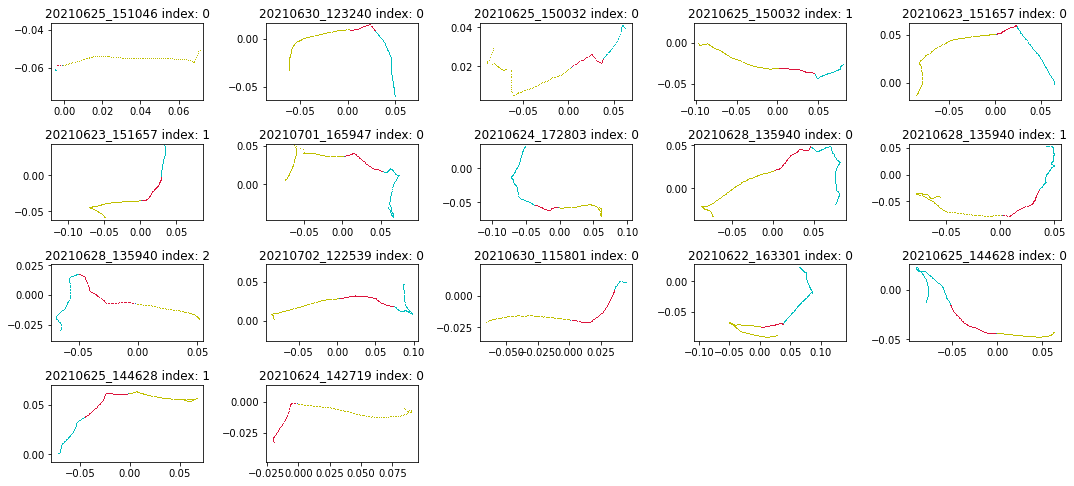

In [42]:
count= 1
fig = plt.figure(figsize=(15,15))
for flies in list_flies:
    piece = df[(df.fly_number == flies)]
    for index in list_distraction_index:
        smaller_piece = piece[piece.distraction_index == index]
        
        if smaller_piece.empty:
            pass
        else:
            ax = fig.add_subplot(9,5,count)
            ax.plot(smaller_piece.x, smaller_piece.y, ',')
            ax.set_title(str(flies)+' index: '+str(index))
            
            ax.plot(smaller_piece[(smaller_piece.timing == 'before')].x, smaller_piece[(smaller_piece.timing == 'before') ].y, ',', color= 'y')
            ax.plot(smaller_piece[(smaller_piece.timing == 'after')].x, smaller_piece[(smaller_piece.timing == 'after') ].y, ',',color= 'c')
            ax.plot(smaller_piece[(smaller_piece.timing == 'bar')].x, smaller_piece[(smaller_piece.timing == 'bar') ].y, (','), color= 'crimson')
            count=count+1
    plt.xlim(-0.1, 0.1)
    plt.ylim(-0.1, 0.1)
    plt.axis('equal')
    plt.tight_layout()
    #plt.savefig("/Users/ambra-stella/bachelor/analysis/TNTe/TNTe_all.pdf")

# Tagges 'other' in reaction_direction:

In [43]:
df['other_tagg'] = ''
for flies in list_flies:
    piece = df[(df.fly_number == flies)]

    for index in list_distraction_index:
        second_other = piece[(piece.distraction_index == index) & (piece.reaction_direction == 'other')]
        other = second_other['distraction_index']
        
        if other.empty:
            pass
        else:
            df.loc[(df.distraction_index == index) & (df.fly_number == flies), 'other_tagg'] = '1'
         


# Number of flies going up/down:


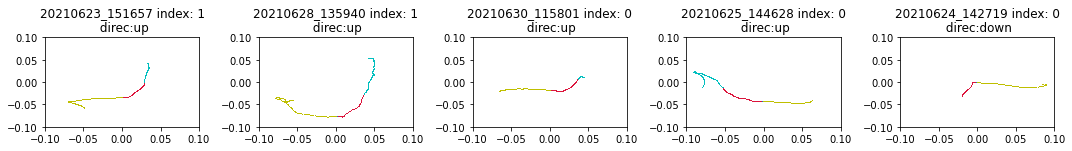

In [44]:

up_down_list = []
for flies in list_flies:
    look_at = df[(df.fly_number == flies) & ((df.reaction_direction == 'up') | (df.reaction_direction == 'down'))]
    up_down = look_at['fly_number']
    if up_down.empty:
        pass
    else:
        up_down = up_down[-1:]
        up_down = up_down.values
        up_down = [str(i) for i in up_down]
        up_down = up_down[0]
        #print('second:', up_down)
        #print('second:', type(up_down))
        up_down_list.append(up_down)
#up_down_list


count= 1
fig = plt.figure(figsize=(15,15))

for flies in up_down_list:
    piece = df[(df.fly_number == flies)]

    for index in list_distraction_index:
        smaller_piece = piece[(piece.distraction_index == index) & (piece.other_tagg != '1')]
        
            
            
        if smaller_piece.empty :
            pass
        else:
    
            
            direc_piece = smaller_piece[smaller_piece.timing == 'bar']
            direc = direc_piece['reaction_direction']
            #print('direc_piece:', direc)
            direc = direc[-1:]
            direc = direc.values
            direc = [str(i) for i in direc]
            direc = direc[0]
            #print(direc)
        
            ax = fig.add_subplot(9,5,count)
            ax.plot(smaller_piece.x, smaller_piece.y, ',')
            ax.set_title(str(flies)+ ' index: '+str(index) + '\n direc:' + str(direc))
            
            ax.plot(smaller_piece[(smaller_piece.timing == 'before')].x, smaller_piece[(smaller_piece.timing == 'before') ].y, ',', color= 'y')
            ax.plot(smaller_piece[(smaller_piece.timing == 'after')].x, smaller_piece[(smaller_piece.timing == 'after') ].y, ',',color= 'c')
            ax.plot(smaller_piece[(smaller_piece.timing == 'bar')].x, smaller_piece[(smaller_piece.timing == 'bar') ].y, (','), color= 'crimson')
            count=count+1
            ax.set_xlim(-0.1, 0.1)
            ax.set_ylim(-0.1, 0.1)
            #ax.axis('equal')
    plt.tight_layout()
    #print(count-1)
#plt.savefig("/Users/ambra-stella/bachelor/analysis/wt/wt_up_down.pdf")

# Number of flies which went up or down, went into the same direction as before again:


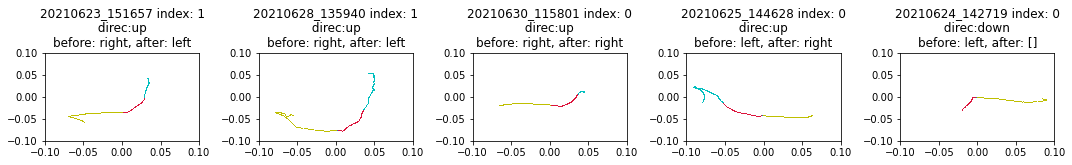

In [46]:
up_down_list = []
for flies in list_flies:
    look_at = df[(df.fly_number == flies) & ((df.reaction_direction == 'up') | (df.reaction_direction == 'down'))]
    up_down = look_at['fly_number']
    if up_down.empty:
        pass
    else:
        up_down = up_down[-1:]
        up_down = up_down.values
        up_down = [str(i) for i in up_down]
        up_down = up_down[0]
        #print('second:', up_down)
        #print('second:', type(up_down))
        up_down_list.append(up_down)
        
count= 1
fig = plt.figure(figsize=(15,15))

for flies in up_down_list:
    piece = df[(df.fly_number == flies)]

    for index in list_distraction_index:
        smaller_piece = piece[(piece.distraction_index == index) & (piece.other_tagg != '1')]
        
        #print('smaller_piece:', smaller_piece)
            
        if smaller_piece.empty :
            pass
        else:
            
            direc_piece = smaller_piece[smaller_piece.timing == 'bar']
            direc = direc_piece['reaction_direction']
            #print('direc_piece:', direc)
            direc = direc[-1:]
            direc = direc.values
            direc = [str(i) for i in direc]
            direc = direc[0]
            
            before_direc_piece = smaller_piece.loc[(smaller_piece.timing == 'before')]
            before_direc = before_direc_piece['reaction_direction']
            #print('direc_piece:', direc_piece)
            #direc = direc[-1:]
            before_direc = before_direc.values
            #print(direc)
            before_direc = [str(i) for i in before_direc]
            #print('before_direc:', direc)
            before_direc = before_direc[1]
            #print('before_direc:',before_direc)
        
            after_direc_piece = smaller_piece.loc[(smaller_piece.timing == 'after')]
            after_direc = after_direc_piece['reaction_direction']
            #print('direc_piece:', direc_piece)
            #direc = direc[-1:]
            after_direc = after_direc.values
            #print(direc)
            after_direc = [str(i) for i in after_direc]
            #print('after_direc:', direc)
            if after_direc == []:
                pass
            else:
                after_direc = after_direc[1]
                #print('after_direc:',after_direc)
        
            
            
            ax = fig.add_subplot(9,5,count)
            ax.plot(smaller_piece.x, smaller_piece.y, ',')
            ax.set_title(str(flies) + ' index: '+str(index) + '\n direc:' + str(direc) + ' \nbefore: ' + str(before_direc) + ', after: ' + str(after_direc))
            
            ax.plot(smaller_piece[(smaller_piece.timing == 'before')].x, smaller_piece[(smaller_piece.timing == 'before') ].y, ',', color= 'y')
            ax.plot(smaller_piece[(smaller_piece.timing == 'after')].x, smaller_piece[(smaller_piece.timing == 'after') ].y, ',',color= 'c')
            ax.plot(smaller_piece[(smaller_piece.timing == 'bar')].x, smaller_piece[(smaller_piece.timing == 'bar') ].y, (','), color= 'crimson')
            
            count=count+1
            
            ax.set_xlim(-0.1, 0.1)
            ax.set_ylim(-0.1, 0.1)
            #ax.set_aspect('box')
    plt.tight_layout()
#plt.savefig("/Users/ambra-stella/bachelor/analysis/TNTe/TNTe_valid.pdf")

#

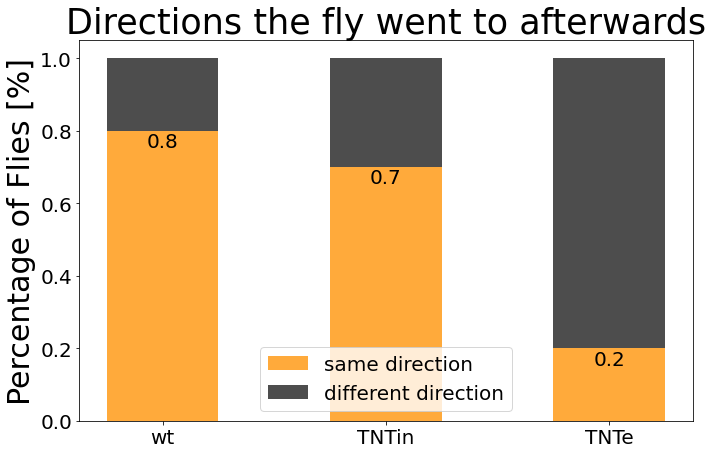

In [11]:
labels = ['wt', 'TNTin', 'TNTe']
same_direction = [0.8, 0.7, 0.2]
different_direction = [0.2, 0.3, 0.8]
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(11,7))

ax.bar(labels, same_direction, width, label='same direction', color = ['#ffaa3b'])
ax.bar(labels, different_direction, width, bottom=same_direction,
       label='different direction', color = ['#4d4d4d'])

plt.text (0, 0.77, '0.8', fontsize=20, ha='center', va='center')
plt.text (1, 0.67, '0.7', fontsize=20,ha='center', va='center')
plt.text (2, 0.17, '0.2', fontsize=20, ha='center', va='center')

ax.set_ylabel('Percentage of Flies [%]', fontsize=30)
ax.set_title('Directions the fly went to afterwards', fontsize=35)
ax.legend(fontsize=20)
ax.tick_params(axis='both', labelsize = 20)

#plt.show()
#plt.savefig("/Users/ambra-stella/bachelor/analysis/plots/Directions_the_fly_went_to_afterwards.pdf")

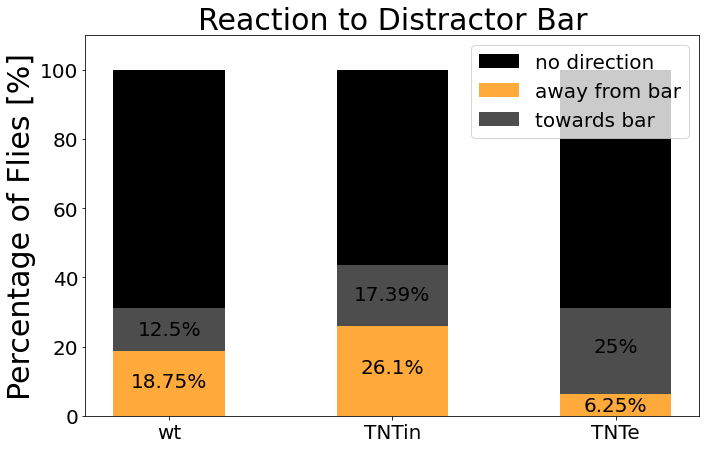

In [27]:
labels = ['wt', 'TNTin', 'TNTe']
towards_direction = [12.5, 17.39, 25 ]
away_direction = [18.75, 26.1 , 6.25 ]
no_direction = [100, 100, 100]
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(11,7))

ax.bar(labels, no_direction, width, label='no direction', color = ['#000000'])
ax.bar(labels, away_direction, width, label='away from bar', color = ['#ffaa3b'])#4d4d4d
ax.bar(labels, towards_direction, width, label='towards bar', bottom =away_direction,  color = ['#4d4d4d'])



plt.text (0, 25, '12.5%', fontsize=20, ha='center', va='center')
plt.text (1, 35, '17.39%', fontsize=20,ha='center', va='center')
plt.text (2, 20, '25%', fontsize=20, ha='center', va='center')

plt.text (0, 10, '18.75%', fontsize=20, ha='center', va='center')
plt.text (1, 14, '26.1%', fontsize=20,ha='center', va='center')
plt.text (2, 3, '6.25%', fontsize=20, ha='center', va='center')


plt.ylim(0, 110)
ax.set_ylabel('Percentage of Flies [%]', fontsize=30)
ax.set_title('Reaction to Distractor Bar', fontsize=30)
ax.legend(fontsize=20)
ax.tick_params(axis='both', labelsize = 20)

#plt.show()
#plt.savefig("/Users/ambra-stella/bachelor/analysis/plots/Directions_reaction_to_distraction_bar.pdf")

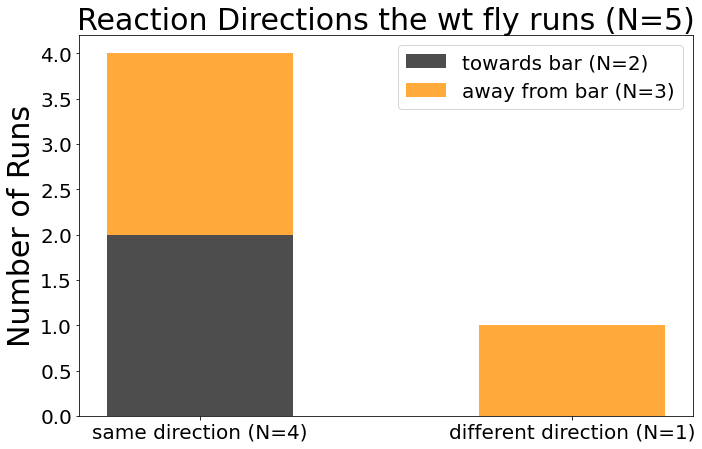

In [25]:
labels = ['same direction (N=4)', 'different direction (N=1)']
same_direction = [2, 0]
different_direction = [2, 1]
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(11,7))

ax.bar(labels, same_direction, width, label='towards bar (N=2)', color = ['#ffaa3b'])
ax.bar(labels, different_direction, width, bottom=same_direction,
       label='away from bar (N=3)', color = ['#4d4d4d'])

ax.set_ylabel('Number of Runs',fontsize=30)
ax.set_title('Reaction Directions the wt fly runs (N=5)', fontsize=30)
ax.legend(fontsize=20)
ax.tick_params(axis='both', labelsize = 20)

#plt.show()
#plt.savefig("/Users/ambra-stella/bachelor/analysis/plots/reaction_directions_the_wt_fly_runs.pdf")

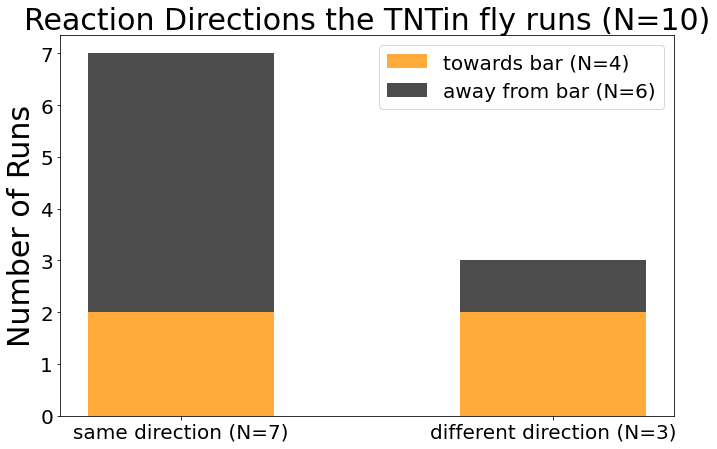

In [4]:
labels = ['same direction (N=7)', 'different direction (N=3)']
same_direction = [2, 2]
different_direction = [5, 1]
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(11,7))

ax.bar(labels, same_direction, width, label='towards bar (N=4)', color = ['#ffaa3b'])
ax.bar(labels, different_direction, width, bottom=same_direction,
       label='away from bar (N=6)',  color = ['#4d4d4d'])

ax.set_ylabel('Number of Runs', fontsize=30)
ax.set_title('Reaction Directions the TNTin fly runs (N=10)',fontsize=30)
ax.legend(fontsize=20)
ax.tick_params(axis='both', labelsize = 20)

#plt.show()
#plt.savefig("/Users/ambra-stella/bachelor/analysis/plots/reaction_directions_the_TNTin_fly_runs.pdf")

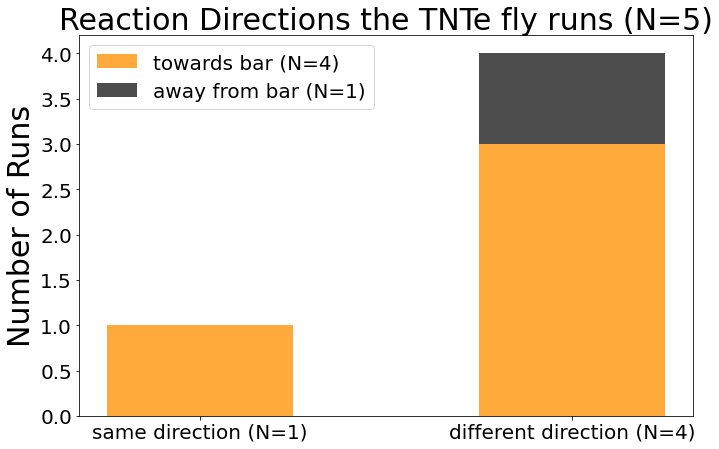

In [26]:
labels = ['same direction (N=1)', 'different direction (N=4)']
same_direction = [1, 3]
different_direction = [0, 1]
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(11,7))

ax.bar(labels, same_direction, width, label='towards bar (N=4)', color = ['#ffaa3b'])
ax.bar(labels, different_direction, width, bottom=same_direction,
       label='away from bar (N=1)', color = ['#4d4d4d'])

ax.set_ylabel('Number of Runs', fontsize=30)
ax.set_title('Reaction Directions the TNTe fly runs (N=5)', fontsize=30)
ax.legend(fontsize=20)
ax.tick_params(axis='both', labelsize = 20)

#plt.show()
#plt.savefig("/Users/ambra-stella/bachelor/analysis/plots/reaction_directions_the_TNTe_fly_runs.pdf")

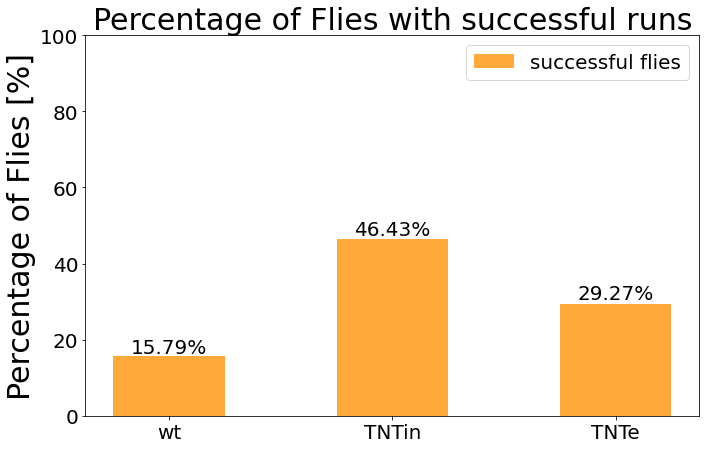

In [34]:
labels = ['wt', 'TNTin', 'TNTe']
same_direction = [15.79, 46.43, 29.27]
#different_direction = [0.2, 0.3, 0.8]
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(11,7))

ax.bar(labels, same_direction, width, label='successful flies', color = ['#ffaa3b'])
#ax.bar(labels, different_direction, width, bottom=same_direction,
       #label='different direction')

ax.set_ylabel('Percentage of Flies [%]', fontsize=30)

#ax.set_xlabel(fontsize=12)
plt.ylim(0, 100)
plt.text (0, 18, '15.79%', fontsize=20, ha='center', va='center')
plt.text (1, 49, '46.43%', fontsize=20,ha='center', va='center')
plt.text (2, 32, '29.27%', fontsize=20, ha='center', va='center')
ax.set_title('Percentage of Flies with successful runs', fontsize=30)
ax.legend(fontsize=20)
ax.tick_params(axis='both', labelsize = 20)

#plt.show()
#plt.savefig("/Users/ambra-stella/bachelor/analysis/plots/Percentage_of_good_Flies.pdf")

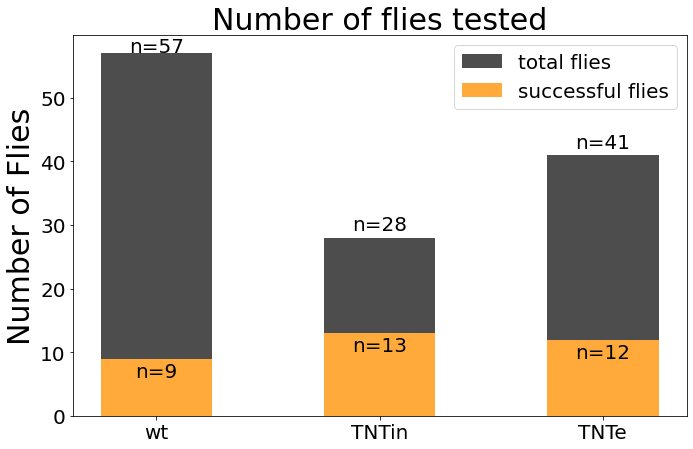

In [32]:
labels = ['wt', 'TNTin', 'TNTe']
same_direction = [9, 13, 12]
different_direction = [57-9, 28-13, 41-12]
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(11,7))

ax.bar(labels, different_direction, width, bottom=same_direction,
       label='total flies', color = ['#4d4d4d'])
ax.bar(labels, same_direction, width, label='successful flies', color = ['#ffaa3b'])

plt.text (0, 7, 'n=9', fontsize=20, ha='center', va='center')
plt.text (1, 11, 'n=13', fontsize=20,ha='center', va='center')
plt.text (2, 10, 'n=12', fontsize=20, ha='center', va='center')

plt.text (0, 58, 'n=57', fontsize=20, ha='center', va='center')
plt.text (1, 30, 'n=28', fontsize=20,ha='center', va='center')
plt.text (2, 43, 'n=41', fontsize=20, ha='center', va='center')


ax.set_ylabel('Number of Flies', fontsize=30)
ax.set_title('Number of flies tested', fontsize=30)
ax.legend(fontsize=20)
ax.tick_params(axis='both', labelsize = 20)

#plt.show()
#plt.savefig("/Users/ambra-stella/bachelor/analysis/plots/Number_of_flies_tested.pdf")